In [5]:
import numpy as np
import matplotlib.pyplot as plt

p_heads = .4
GAMMA = 1
rewards = np.zeros(101) #rewards for each state including 100
rewards[100] = 1

class policy_iteration:
	def __init__(self):
		self.val_state = np.zeros(101)
		self.policy = np.zeros(100)

	def bellman(self, state, action, val_state):
		return p_heads * (rewards[state + action] + GAMMA * val_state[state + action]) + (1 - p_heads) * (rewards[state - action] + GAMMA * val_state[state - action])

	def policy_evaluation(self, epsilon = 0.00000000000001):
		while True:
			delta = 0
			#print('STARTING POLICY EVALUATION')
			for state in range(1,100):
				v = self.val_state[state]
				# print('state', state)
				# print('policy at state', self.policy[state])
				# print('val state', self.val_state)
				self.val_state[state] = self.bellman(state, int(self.policy[state]), self.val_state)
				#val_state[state] is weighted sum over all possible transitions for the policy from this state
				delta = max(delta, np.abs(self.val_state[state] - v))
			if delta < epsilon:
				break
		return self.policy_improvement()

	def policy_improvement(self):
		policy_stable = True
		#print('STARTING POLICY IMPROVEMENT')
		for state in range(1,100):
			old_action = self.policy[state]
			max_action = min(state, 100-state)
			val_action = np.zeros(max_action+1)
			for action in range(1, max_action+1):
				val_action[action] = self.bellman(state, action, self.val_state)
			#x = np.argwhere(val_action == np.max(val_action))
			#self.policy[state] = x[-1]
			self.policy[state] = np.argmax(val_action)
			# print('state', state)
			# print(np.argwhere(val_action >= np.max(val_action)).squeeze())
			# print(self.policy[state])
			# #print(np.argwhere(val_action >= np.max(val_action)*0.99).squeeze())
			# print(np.random.choice(np.argwhere(val_action == np.max(val_action)).squeeze()))
			#self.policy[state] = np.random.choice(np.argwhere(val_action == np.max(val_action)).squeeze())
			
			if old_action != self.policy[state]:
				policy_stable = False
				print('Not stable state', state)
		print('Stable situation', policy_stable)
		if policy_stable != True:
				self.policy_evaluation()
		return self.val_state, self.policy

Not stable state 50
Not stable state 51
Not stable state 52
Not stable state 53
Not stable state 54
Not stable state 55
Not stable state 56
Not stable state 57
Not stable state 58
Not stable state 59
Not stable state 60
Not stable state 61
Not stable state 62
Not stable state 63
Not stable state 64
Not stable state 65
Not stable state 66
Not stable state 67
Not stable state 68
Not stable state 69
Not stable state 70
Not stable state 71
Not stable state 72
Not stable state 73
Not stable state 74
Not stable state 75
Not stable state 76
Not stable state 77
Not stable state 78
Not stable state 79
Not stable state 80
Not stable state 81
Not stable state 82
Not stable state 83
Not stable state 84
Not stable state 85
Not stable state 86
Not stable state 87
Not stable state 88
Not stable state 89
Not stable state 90
Not stable state 91
Not stable state 92
Not stable state 93
Not stable state 94
Not stable state 95
Not stable state 96
Not stable state 97
Not stable state 98
Not stable state 99


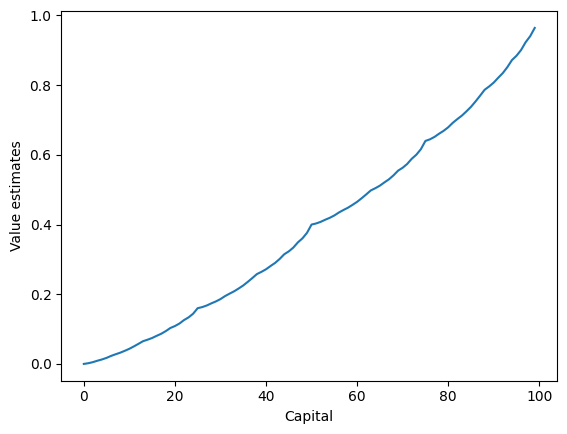

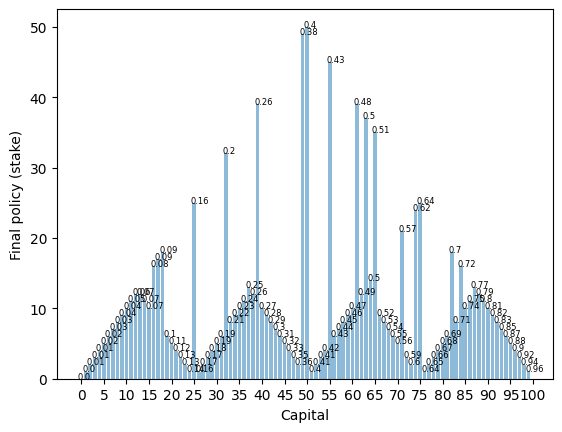

In [6]:
# vi = value_iteration()
# v, p = vi.val_iteration()
# print(v)
# print(p)

pi = policy_iteration()
v, p = pi.policy_evaluation()
print(v)
print(p)

plt.plot(range(100), v[:100])
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

plt.bar(range(100), p, align = 'center', alpha = 0.5)
for i in range(100):
	plt.text(i - 0.75, p[i] + 0.01, str(round(v[i],2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final policy (stake)')
plt.show()